In [67]:
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

In [113]:
random_2d_points = torch.rand(100, 2)
random_tranforms = torch.randn(4, 2, 2)
# torch.nn.init.orthogonal_(random_tranforms)
transformed_points = torch.einsum('ne,ked->knd', random_2d_points, random_tranforms)

In [114]:
def plot_cov_ellipse(mean, cov, ax, n_std=2.0, **kwargs):
    """Plot a covariance ellipse centered at the mean"""
    # Eigenvalues and eigenvectors for the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov)

    # Compute the angle of rotation for the ellipse
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))

    # Width and height of ellipse (2*n_std*sqrt(eigenvalue) for n_std sigma)
    width, height = 2 * n_std * np.sqrt(eigenvalues)

    # Draw the ellipse
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, **kwargs)
    ax.add_patch(ellipse)

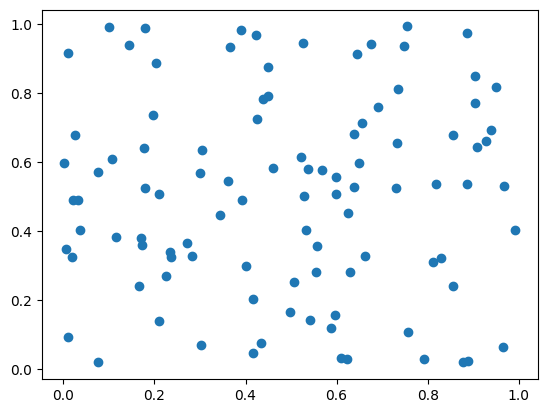

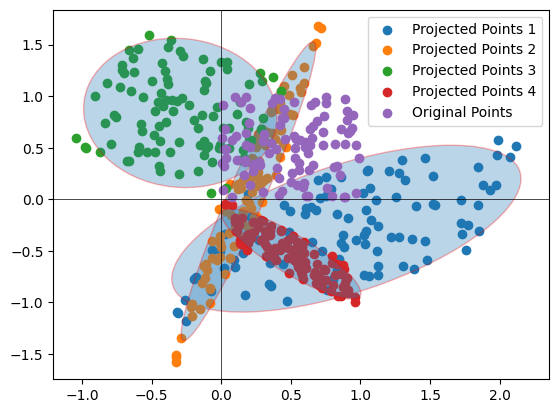

In [115]:
plt.scatter(random_2d_points[:, 0], random_2d_points[:, 1])
fig, ax = plt.subplots()
for k in range(transformed_points.shape[0]):
    plt.scatter(transformed_points[k, :, 0], transformed_points[k, :, 1], label=f'Projected Points {k + 1}')
    # plot gaussian distribution
    mean = np.mean(transformed_points[k].numpy(), axis=0)
    cov = np.cov(transformed_points[k].numpy(), rowvar=False)
    plot_cov_ellipse(mean, cov, ax, n_std=2, edgecolor='red', alpha=0.3)

ax.scatter(random_2d_points[:, 0], random_2d_points[:, 1], label='Original Points')
    
# show x and y axis
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()
plt.show()

In [76]:
torch.mean(transformed_points[0], axis=0)

tensor([0.0352, 0.0861])